# Anomaly detection k means

In [26]:
import pandas as pd
import numpy as np

import matplotlib
import seaborn
import matplotlib.dates as md
from matplotlib import pyplot as plt

from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [27]:
%run anomaly_detection_common.ipynb

## Loading dataset

In [28]:
dataset = ATSFDataset().load()
data_df = dataset.get_df()
data_df.head(100)

,timestamp,value_f,value_c,hours,daylight,day_of_the_week,week_day,time_epoch,categories
0,2013-07-04 00:00:00,69.880835,21.044908,0,0,3,1,13728960,2
1,2013-07-04 01:00:00,71.220227,21.789015,1,0,3,1,13728996,2
2,2013-07-04 02:00:00,70.877805,21.598781,2,0,3,1,13729032,2
3,2013-07-04 03:00:00,68.959400,20.533000,3,0,3,1,13729068,2
4,2013-07-04 04:00:00,69.283551,20.713084,4,0,3,1,13729104,2
...,...,...,...,...,...,...,...,...,...
95,2013-07-07 23:00:00,64.246634,17.914796,23,0,6,0,13732380,0
96,2013-07-08 00:00:00,62.480785,16.933769,0,0,0,1,13732416,2
97,2013-07-08 01:00:00,62.030554,16.683641,1,0,0,1,13732452,2
98,2013-07-08 02:00:00,63.411560,17.450867,2,0,0,1,13732488,2


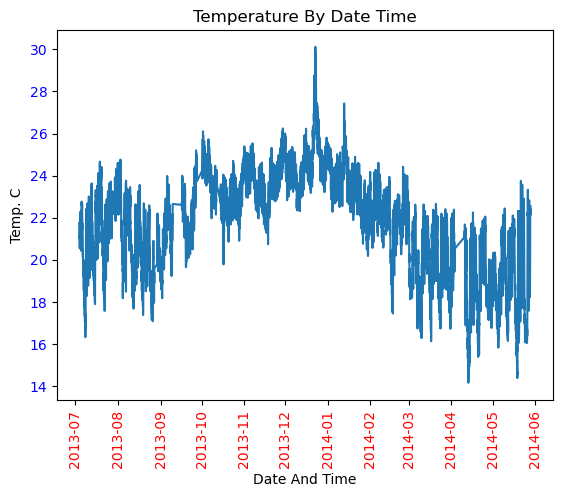

In [29]:
dataset.plot()

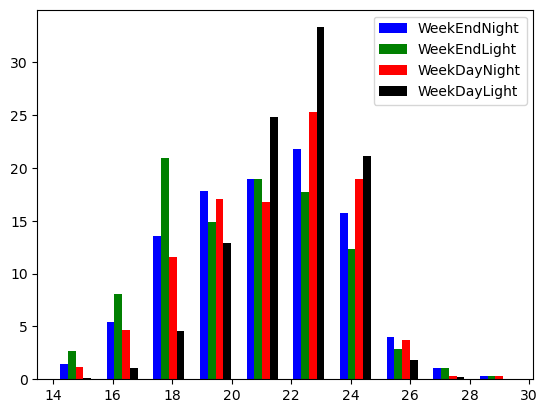

In [30]:
dataset.plot_categories()

In [31]:
# Take useful feature and standardize them
filted_df = data_df[[ATSFDataset.Columns.VALUE_C, ATSFDataset.Columns.HOURS, \
           ATSFDataset.Columns.DAYLIGHT, ATSFDataset.Columns.DAY_OF_THE_WEEK, \
           ATSFDataset.Columns.WEEK_DAY]]

min_max_scaler = preprocessing.StandardScaler()
np_scaled = min_max_scaler.fit_transform(filted_df)
scaled_df = pd.DataFrame(np_scaled)

# reduce to 2 importants features
pca = PCA(n_components=2)
reduced_df = pca.fit_transform(scaled_df)

# standardize these 2 new features
min_max_scaler = preprocessing.StandardScaler()
np_scaled = min_max_scaler.fit_transform(reduced_df)
train_df = pd.DataFrame(np_scaled)

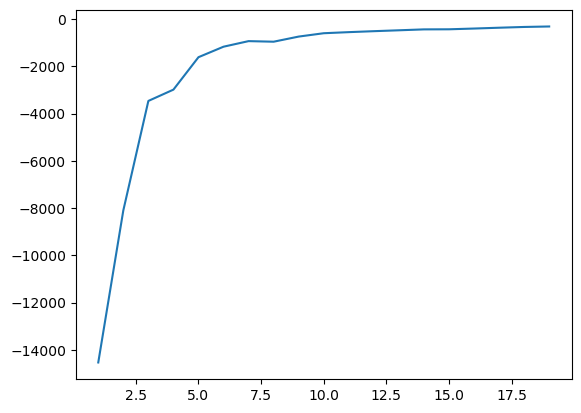

In [32]:
# calculate with different number of centroids to see the loss plot (elbow method)
n_cluster = range(1, 20)
kmeans = [KMeans(n_clusters=i, n_init='auto').fit(train_df) for i in n_cluster]
scores = [kmeans[i].score(train_df) for i in range(len(kmeans))]

fig, ax = plt.subplots()
ax.plot(n_cluster, scores)
plt.show()

In [33]:
# Not clear for me, I choose 15 centroids arbitrarily and add these data to the central dataframe
kmeans_results_df = pd.DataFrame(columns=['cluster', 'principal_feature1', 'principal_feature2'])

kmeans_results_df['cluster'] = kmeans[14].predict(train_df)
kmeans_results_df['principal_feature1'] = train_df[0]
kmeans_results_df['principal_feature2'] = train_df[1]

kmeans_results_df['cluster'].value_counts()

4     758
7     670
9     609
6     566
13    538
3     500
11    488
8     486
14    458
12    442
5     434
1     375
10    358
0     347
2     238
Name: cluster, dtype: int64

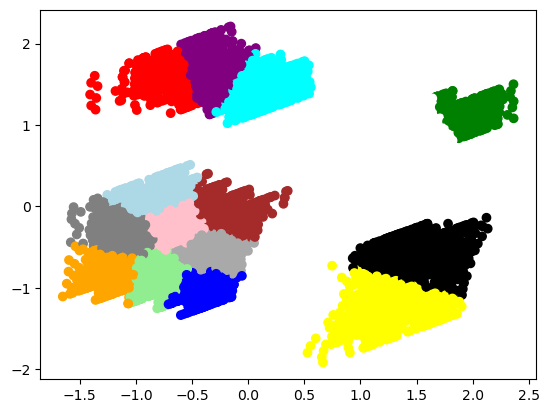

In [34]:
#plot the different clusters with the 2 main features
fig, ax = plt.subplots()
colors = {
    0:'red', 
    1:'blue', 
    2:'green', 
    3:'pink', 
    4:'black', 
    5:'orange', 
    6:'cyan', 
    7:'yellow', 
    8:'brown', 
    9:'purple', 
    10:'white', 
    11: 'grey', 
    12:'lightblue', 
    13:'lightgreen', 
    14: 'darkgrey'
}

ax.scatter(kmeans_results_df['principal_feature1'], \
           kmeans_results_df['principal_feature2'], \
           c=kmeans_results_df["cluster"].apply(lambda x: colors[x]))
plt.show()